<a href="https://colab.research.google.com/github/esa-prakasa/ConvNet/blob/master/e_Image_Classification_with_Pytorch_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification with Pytorch - Part 1

In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.nn import functional as F
import numpy as np
from sklearn.metrics import classification_report
from datetime import datetime

date = datetime.now()
print(date)


2022-01-18 14:31:42.338348


In [5]:
torch.manual_seed(0) # for REPRODUCIBILITY

## Load MNIST Dataset

In [6]:
mnist_data_train = datasets.MNIST('data', 
                            train=True, 
                            download=True, 
                            transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(mnist_data_train, batch_size=4,
                                          shuffle=True)
mnist_data_test = datasets.MNIST('data', 
                            train=False, 
                            download=True, 
                            transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(mnist_data_test, batch_size=4,
                                          shuffle=True)

print("Done!")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Done!


#### Single Image visualization

In [7]:
def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [9]:
images[0].shape

torch.Size([1, 28, 28])

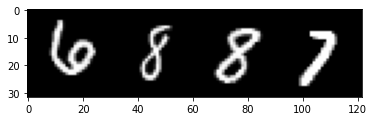

In [10]:
imshow(torchvision.utils.make_grid(images)) # image preview

In [11]:
print("label is:")
print(' '.join('%5s' % int(labels[j]) for j in range(4))) #label

label is:
    6     8     8     7


## Define model (simple logistic regression)

In [12]:
# define model
class MulticlassLogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MulticlassLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.reshape(-1, 28 * 28)
        out = self.linear(x)
        return out

# ***Model Training***

In [15]:
# construct model instance
simplenn = MulticlassLogisticRegression(
    input_dim=28 * 28,
    output_dim=10
)
# loss function
criterion = nn.CrossEntropyLoss()
# set up optimizer
optimizer = torch.optim.SGD(simplenn.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = simplenn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:# print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.625
[1,  4000] loss: 1.013
[1,  6000] loss: 0.817
[1,  8000] loss: 0.711
[1, 10000] loss: 0.628
[1, 12000] loss: 0.591
[1, 14000] loss: 0.553
[2,  2000] loss: 0.519
[2,  4000] loss: 0.524
[2,  6000] loss: 0.495
[2,  8000] loss: 0.467
[2, 10000] loss: 0.463
[2, 12000] loss: 0.460
[2, 14000] loss: 0.447
[3,  2000] loss: 0.440
[3,  4000] loss: 0.426
[3,  6000] loss: 0.421
[3,  8000] loss: 0.429
[3, 10000] loss: 0.422
[3, 12000] loss: 0.417
[3, 14000] loss: 0.394
[4,  2000] loss: 0.391
[4,  4000] loss: 0.415
[4,  6000] loss: 0.392
[4,  8000] loss: 0.392
[4, 10000] loss: 0.393
[4, 12000] loss: 0.382
[4, 14000] loss: 0.381
[5,  2000] loss: 0.386
[5,  4000] loss: 0.377
[5,  6000] loss: 0.382
[5,  8000] loss: 0.363
[5, 10000] loss: 0.379
[5, 12000] loss: 0.366
[5, 14000] loss: 0.370
[6,  2000] loss: 0.365
[6,  4000] loss: 0.362
[6,  6000] loss: 0.349
[6,  8000] loss: 0.366
[6, 10000] loss: 0.373
[6, 12000] loss: 0.362
[6, 14000] loss: 0.345
[7,  2000] loss: 0.358
[7,  4000] 

### **Test and Evaluation Report**

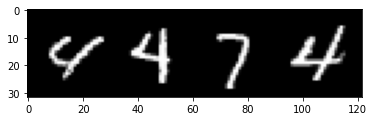

GroundTruth:      4     4     7     4


In [31]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % int(labels[j]) for j in range(4)))

In [32]:
outputs = simplenn(images)
print("label is:")
print(' '.join('%5s' % int(labels[j]) for j in range(4))) #label

label is:
    4     4     7     4


### **Weight visualisation**

In [33]:
weights_0 = simplenn.linear.weight.data[0].reshape(28, 28)
weights_1 = simplenn.linear.weight.data[1].reshape(28, 28)
weights_2 = simplenn.linear.weight.data[2].reshape(28, 28)
weights_3 = simplenn.linear.weight.data[3].reshape(28, 28)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


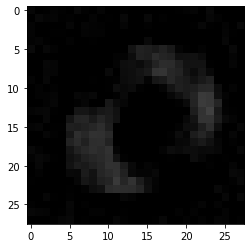

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


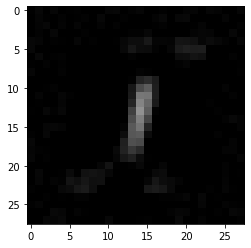

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


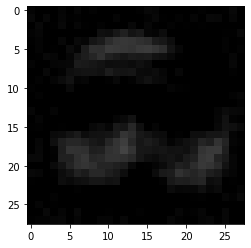

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


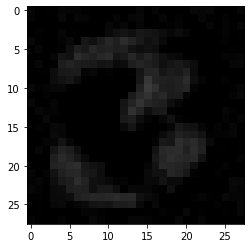

In [34]:
imshow(torchvision.utils.make_grid(weights_0))
imshow(torchvision.utils.make_grid(weights_1))
imshow(torchvision.utils.make_grid(weights_2))
imshow(torchvision.utils.make_grid(weights_3))


Evaluate all test data

In [35]:
y_true = []
y_predict = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = simplenn(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += list(labels)
        y_predict += list(predicted)

Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)


array([[ 960,    0,    2,    2,    0,    6,    7,    1,    2,    0],
       [   0, 1103,    2,    4,    1,    3,    4,    1,   17,    0],
       [  11,    7,  899,   17,   17,    1,   14,   18,   40,    8],
       [   4,    1,   18,  915,    1,   27,    3,   13,   19,    9],
       [   1,    3,    5,    1,  917,    0,   10,    2,    8,   35],
       [  11,    3,    4,   39,   10,  760,   16,   11,   31,    7],
       [  16,    3,    4,    3,   13,   13,  903,    1,    2,    0],
       [   4,   13,   23,    7,    8,    0,    0,  943,    3,   27],
       [  11,    9,    7,   27,    9,   22,   13,   16,  851,    9],
       [  11,    7,    4,   11,   50,    9,    0,   30,    7,  880]])

In [39]:
print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.93      0.87      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.89      0.93      0.91       982
           5       0.90      0.85      0.88       892
           6       0.93      0.94      0.94       958
           7       0.91      0.92      0.91      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.87      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

